### PAPER's Figures 3 and 4

In [1]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import handling_data               as hdata

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
#colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
colors = ['#ff0000', "#41b6c4", '#0000ff']
my_cmap = ListedColormap(colors, name="my_cmap")
#my_cmap_r = my_cmap.reversed()
#############################################
## NAMASTER (https://namaster.readthedocs.io/en/latest/)
import pymaster as nmt
del_l  = 20
nside  = 256
##############################
b    = nmt.NmtBin.from_nside_linear(nside, nlb=del_l)
leff = b.get_effective_ells()
feff = leff*(leff+1)/2/np.pi

## LOW-Z

In [41]:
##########################################
## THEORETICAL
prefix = 'lowz'
suffix = 'nch30_980_1260'
##########################################
## PATH to THEORECTICAL APS 
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
##
##########################################
## LOADING DATA+
clf1 = np.loadtxt(filepath_field1).T
clf2 = np.loadtxt(filepath_field2).T
clcx = np.loadtxt(filepath_cross ).T
##
nch = int(clf1.shape[0])-1
##
savefigs = True

In [42]:
#######
# SIMULATION
pathsims      = '/data/AMARINS/CMBWLxHI-DATA/simulations/{}_{}'.format(prefix, suffix)
load_sims     = True
generate_sims = False
varnames      = ['cl_hi_sim', 'cl_kappa_sim', 'cl_cross_sim']
nsims_to_use  = 100

if generate_sims:
    itime     = time.time()
    clf1_dict = cxft.cls_from_matrix2dict(clf1)
    clf2_dict = cxft.cls_from_matrix2dict(clf2)
    clcx_dict = cxft.cls_from_matrix2dict(clcx)    
    dict_sims = cxfs.dictionary_cross_simulations_quantities(clf1_dict_=clf1_dict, clf2_dict_=clf2_dict, clcx_dict_=clcx_dict, 
                                                             seed_k=9001, seed_hi=9000, nsims=nsims_to_use,
                                                             show_time=False)
    nbins = dict_sims['sim0']['alm_hi_sim'].shape[0]
    l     = dict_sims['sim0']['l']
    print('Load/organize {0:d} sims: {1:.4f} seg'.format(nsims, time.time()-itime)) 

if load_sims:
    nsims_to_use=100
    itime          = time.time()
    dict_sims      = cxfs.get_file_simulated_data(pathsims, varnames, nsims_to_use=nsims_to_use)
    print('Load/organize {0:d} sims: {1:.4f} seg'.format(nsims_to_use, time.time()-itime)) 

sim_names = np.asarray( list(dict_sims.keys()) )

Load/organize 100 sims: 0.2687 seg


'/data/AMARINS/CMBWLxHI-CODES/images/lowz_nch30_980_1260__cl_cross_sim_channels_together.png'

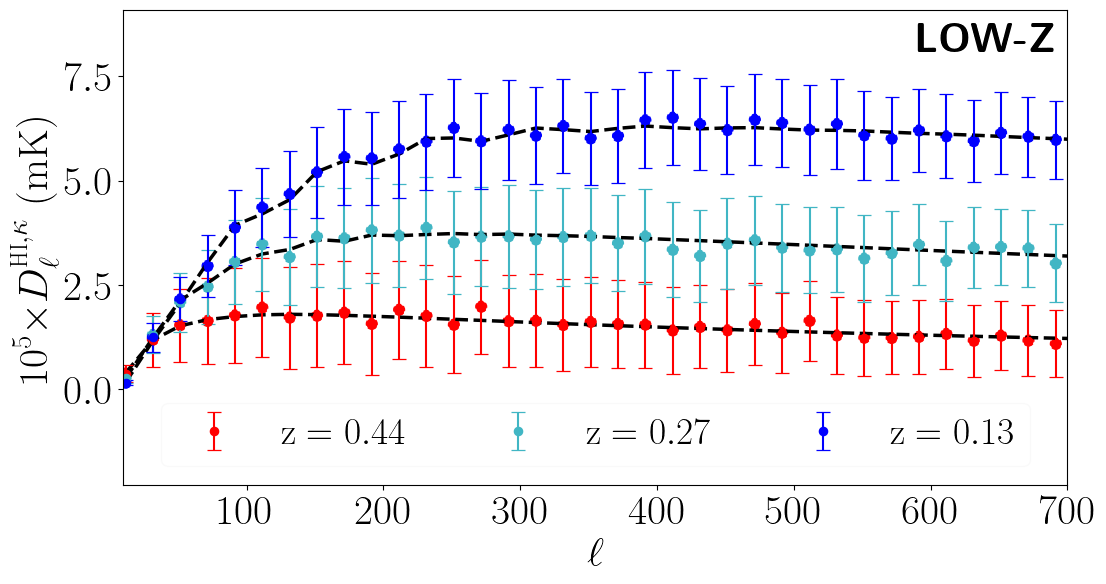

In [47]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(14,6))
plt.subplots_adjust(top=1.1,right=1.6)
########################################################
N        = 3
zeff     = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['zeff']
ibins    = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['bins']
fact_exp = 5
fact     = 10**fact_exp
cmap     = plt.get_cmap(my_cmap, N+1)
varname  = 'cl_cross_sim'
###########################################################
for i, ibin in enumerate(ibins):
    dict_stat_sims_ibin = cxfs.get_stat_from_sims_ibin(dict_sims=dict_sims, varname=varname, sim_name_standard='sim0', b_namaster=b, use_dl=1, ibin=ibin)
    clcx_std = fact*dict_stat_sims_ibin['std']
    clcx_sim = fact*dict_stat_sims_ibin['mean']
    clcx_th  = fact*clcx[ibin+1] #clcx_th=[l, cl]; dim(clcx_th)=[nch+1, nl]
    ax.plot(    leff, feff*b.bin_cell(clcx_th), label = None, color='black',lw=2.5, ls='dashed')
    ax.scatter( leff, clcx_sim, marker='o', color=cmap(i), linestyle='dashed', s=60)
    ax.errorbar(leff, clcx_sim, yerr=0.2*clcx_std, 
                c=cmap(i),
                fmt='o', label=r'$\textrm{z} = '+str(zeff[i])+'$',
                markersize=6, capsize=5, markeredgewidth=0.9)
###########################################################
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$ \times D_{\ell}^{\textrm{\LARGE{HI}},\tiny{\kappa}}\ (\textrm{mK})$ ', fontsize=30)
ax.set_xlabel(r'$\ell$ ', fontsize=30)
#ax.axhline(y=0, ls='dashed', color='lightgrey')

ax.set_xlim(10,700)   
ax.set_ylim(-2.3,9.1)   
ax.tick_params(axis='both', labelsize=30)
ax.text(x=650-60, y=8.1, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
ax.legend(ncols=3, fontsize=27, loc='lower center',framealpha=0.1)
###########################################################
if type(suffix)!=type(None): pathname ="/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}_{}.png".format(prefix, suffix, varname,"channels_together")
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}__{}_{}.png".format(prefix,varname,"channels_together")
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/lowz_nch30_980_1260__cl_hi_sim_channels_together.png'

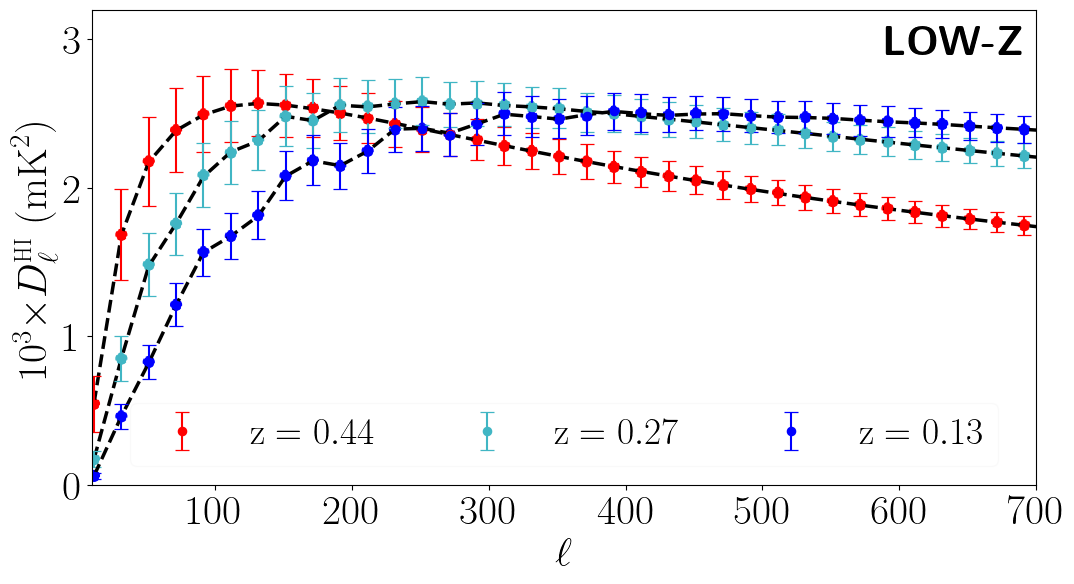

In [48]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(14,6))
plt.subplots_adjust(top=1.1,right=1.6)
########################################################
N        = 3
zeff     = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['zeff']
ibins    = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['bins']
fact_exp = 3
fact     = 10**fact_exp
cmap     = plt.get_cmap(my_cmap, N+1)
varname  = 'cl_hi_sim'
###########################################################
for i, ibin in enumerate(ibins):
    dict_stat_sims_ibin = cxfs.get_stat_from_sims_ibin(dict_sims=dict_sims, varname=varname, sim_name_standard='sim0', b_namaster=b, use_dl=1, ibin=ibin)
    clcx_std = fact*dict_stat_sims_ibin['std']
    clcx_sim = fact*dict_stat_sims_ibin['mean']
    clcx_th  = fact*clf1[ibin+1] #clcx_th=[l, cl]; dim(clcx_th)=[nch+1, nl]
    ax.plot(    leff, feff*b.bin_cell(clcx_th), label = None, color='black',lw=2.5, ls='dashed')
    ax.scatter( leff, clcx_sim, marker='o', color=cmap(i), linestyle='dashed', s=60)
    ax.errorbar(leff, clcx_sim, yerr=1*clcx_std, 
                c=cmap(i),
                fmt='o', label=r'$\textrm{z} = '+str(zeff[i])+'$',
                markersize=6, capsize=5, markeredgewidth=0.9)
###########################################################
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$ \times D_{\ell}^{\textrm{\LARGE{HI}}}\ (\textrm{mK}^2)$ ', fontsize=30)
ax.set_xlabel(r'$\ell$ ', fontsize=30)
#ax.axhline(y=0, ls='dashed', color='black')

ax.set_xlim(10,700)   
ax.set_ylim(0,3.2)   
ax.tick_params(axis='both', labelsize=30)
ax.text(x=650-60, y=2.9, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
ax.legend(ncols=3, fontsize=27, loc='lower center',framealpha=0.1)
###########################################################
if type(suffix)!=type(None): pathname ="/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}_{}.png".format(prefix, suffix, varname,"channels_together")
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}__{}_{}.png".format(prefix,varname,"channels_together")
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

## HIGH-Z

In [49]:
##########################################
## THEORETICAL
prefix = 'highz'
suffix = 'nch70_350_1050'
##########################################
## PATH to THEORECTICAL APS 
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
##
##########################################
## LOADING DATA
clf1 = np.loadtxt(filepath_field1).T
clf2 = np.loadtxt(filepath_field2).T
clcx = np.loadtxt(filepath_cross ).T
##
nch = int(clf1.shape[0])-1
##
savefigs = True

In [50]:
#######
# SIMULATION
pathsims      = '/data/AMARINS/CMBWLxHI-DATA/simulations/{}_{}'.format(prefix, suffix)
load_sims     = True
generate_sims = False
varnames      = ['cl_hi_sim', 'cl_kappa_sim', 'cl_cross_sim']
nsims_to_use  = 100

if generate_sims:
    itime     = time.time()
    clf1_dict = cxft.cls_from_matrix2dict(clf1)
    clf2_dict = cxft.cls_from_matrix2dict(clf2)
    clcx_dict = cxft.cls_from_matrix2dict(clcx)    
    dict_sims = cxfs.dictionary_cross_simulations_quantities(clf1_dict_=clf1_dict, clf2_dict_=clf2_dict, clcx_dict_=clcx_dict, 
                                                             seed_k=9001, seed_hi=9000, nsims=nsims_to_use,
                                                             show_time=False)
    nbins = dict_sims['sim0']['alm_hi_sim'].shape[0]
    l     = dict_sims['sim0']['l']
    print('Load/organize {0:d} sims: {1:.4f} seg'.format(nsims, time.time()-itime)) 

if load_sims:
    itime          = time.time()
    dict_sims      = cxfs.get_file_simulated_data(pathsims, varnames, nsims_to_use=nsims_to_use)
    print('Load/organize {0:d} sims: {1:.4f} seg'.format(nsims_to_use, time.time()-itime)) 

sim_names = np.asarray( list(dict_sims.keys()) )

Load/organize 100 sims: 0.5727 seg


'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050__cl_cross_sim_channels_together.png'

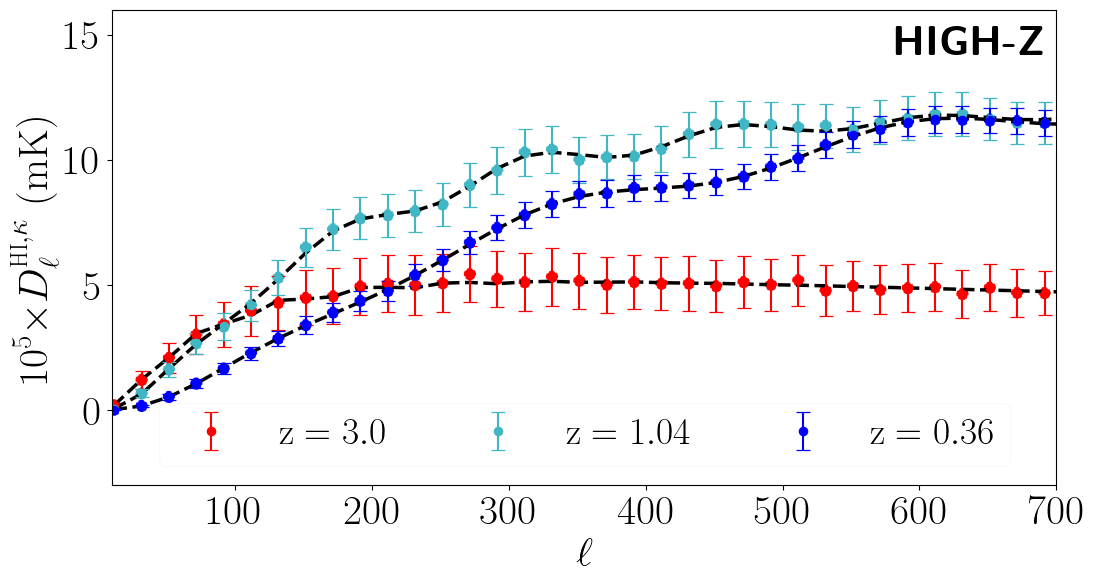

In [51]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(14,6))
plt.subplots_adjust(top=1.1,right=1.6)
########################################################
N        = 3
zeff     = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['zeff']
ibins    = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['bins']
fact_exp = 5
fact     = 10**fact_exp
cmap     = plt.get_cmap(my_cmap, N+1)
varname  = 'cl_cross_sim'
###########################################################
for i, ibin in enumerate(ibins):
    dict_stat_sims_ibin = cxfs.get_stat_from_sims_ibin(dict_sims=dict_sims, varname=varname, sim_name_standard='sim0', b_namaster=b, use_dl=1, ibin=ibin)
    clcx_std = fact*dict_stat_sims_ibin['std']
    clcx_sim = fact*dict_stat_sims_ibin['mean']
    clcx_th  = fact*clcx[ibin+1] #clcx_th=[l, cl]; dim(clcx_th)=[nch+1, nl]
    ax.plot(    leff, feff*b.bin_cell(clcx_th), label = None, color='black',lw=2.5, ls='dashed')
    ax.scatter( leff, clcx_sim, marker='o', color=cmap(i), linestyle='dashed', s=60)
    ax.errorbar(leff, clcx_sim, yerr=0.2*clcx_std, 
                c=cmap(i),
                fmt='o', label=r'$\textrm{z} = '+str(zeff[i])+'$',
                markersize=6, capsize=5, markeredgewidth=0.9)
###########################################################
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$ \times D_{\ell}^{\textrm{\LARGE{HI}},\tiny{\kappa}}\ (\textrm{mK})$ ', fontsize=30)
ax.set_xlabel(r'$\ell$ ', fontsize=30)
#ax.axhline(y=0, ls='dashed', color='lightgrey')

ax.set_xlim(10,700)   
ax.set_ylim(-3,16)   
ax.tick_params(axis='both', labelsize=30)
ax.text(x=650-68, y=14.2, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
ax.legend(ncols=3, fontsize=27, loc='lower center',framealpha=0.1)
###########################################################
if type(suffix)!=type(None): pathname ="/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}_{}.png".format(prefix, suffix, varname,"channels_together")
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}__{}_{}.png".format(prefix,varname,"channels_together")
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050__cl_hi_sim_channels_together.png'

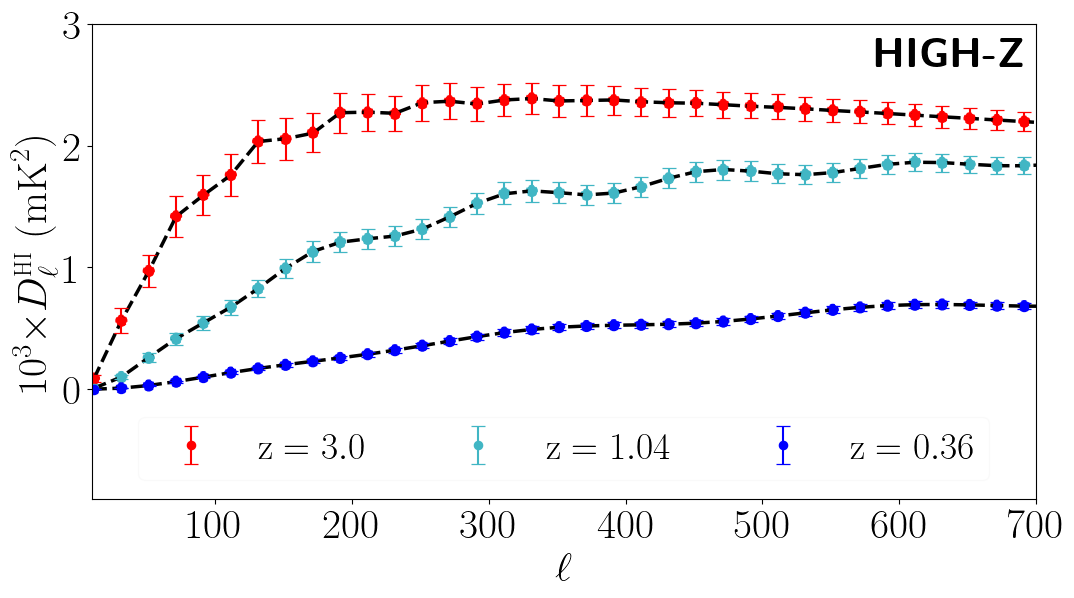

In [52]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(14,6))
plt.subplots_adjust(top=1.1,right=1.6)
########################################################
N        = 3
zeff     = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['zeff']
ibins    = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['bins']
fact_exp = 3
fact     = 10**fact_exp
cmap     = plt.get_cmap(my_cmap, N+1)
varname  = 'cl_hi_sim'
###########################################################
for i, ibin in enumerate(ibins):
    dict_stat_sims_ibin = cxfs.get_stat_from_sims_ibin(dict_sims=dict_sims, varname=varname, sim_name_standard='sim0', b_namaster=b, use_dl=1, ibin=ibin)
    clcx_std = fact*dict_stat_sims_ibin['std']
    clcx_sim = fact*dict_stat_sims_ibin['mean']
    clcx_th  = fact*clf1[ibin+1] #clcx_th=[l, cl]; dim(clcx_th)=[nch+1, nl]
    ax.plot(    leff, feff*b.bin_cell(clcx_th), label = None, color='black',lw=2.5, ls='dashed')
    ax.scatter( leff, clcx_sim, marker='o', color=cmap(i), linestyle='dashed', s=60)
    ax.errorbar(leff, clcx_sim, yerr=1*clcx_std, 
                c=cmap(i), 
                fmt='o', label=r'$\textrm{z} = '+str(zeff[i])+'$',
                markersize=6, capsize=5, markeredgewidth=0.9)
###########################################################
ax.set_yscale('linear'); ax.set_xscale('linear')
ax.set_ylabel(r'$10^{'+str(fact_exp)+'}$' + r'$ \times D_{\ell}^{\textrm{\LARGE{HI}}}\ (\textrm{mK}^2)$ ', fontsize=30)
ax.set_xlabel(r'$\ell$ ', fontsize=30)
#ax.axhline(y=0, ls='dashed', color='lightgrey')

ax.set_xlim(10,700)   
ax.set_ylim(-0.9,3.)   
ax.tick_params(axis='both', labelsize=30)
ax.text(x=650-68, y=2.65, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
ax.legend(ncols=3, fontsize=27, loc='lower center',framealpha=0.1)
###########################################################
if type(suffix)!=type(None): pathname ="/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}_{}.png".format(prefix, suffix, varname,"channels_together")
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}__{}_{}.png".format(prefix,varname,"channels_together")
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname